In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Importing Titanic dataset

In [3]:
d = pd.read_csv(r"C:\Users\Admin\Downloads\train.csv")

In [4]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Collecting Information from Dataset

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.0+ KB


# Checking for Null values, if any  

In [7]:
d.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Dropping Cabin Attribute 

In [8]:
d.pop("Cabin")

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [9]:
d.shape

(889, 11)

# Dropping Irrevelant Attributes

In [10]:
d.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoding Text to Categorical Values

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder = preprocessing.LabelEncoder()

In [13]:
d["Sex"] = label_encoder.fit_transform(d["Sex"])
d["Embarked"] = label_encoder.fit_transform(d["Embarked"])

In [14]:
d.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Applying kNN Algorithm for finding the nearest value

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [18]:
def prediction(n):
    x = d.drop(['Pclass'],axis=1)
    y = d['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 155
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8913857677902621
Confusion matrix when k is 1  
 [[ 62   6   2]
 [  3  37   9]
 [  1   8 139]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8651685393258427
Confusion matrix when k is 2  
 [[ 67   2   1]
 [  8  37   4]
 [  4  17 127]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.8651685393258427
Confusion matrix when k is 3  
 [[ 63   5   2]
 [  7  28  14]
 [  3   5 140]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.8239700374531835
Confusion matrix when k is 4  
 [[ 61   7   2]
 [  8  30  11]
 [  4  15 129]]
------------------------------------------

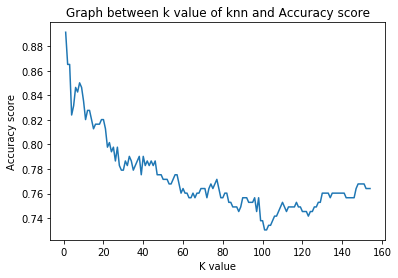

In [19]:
n = int(input('Enter The number of iteration you want for k: '))
prediction(n)

# Observations for deciding the k-value :

Here, when k = 1, we got accuracy 0.8913857677902621 that overfits the data.

When k = 8, the accuracy decreases of the model

So, k = 8 is the best value of k for the model  

